<a href="https://colab.research.google.com/github/Sgiriarun/NER_NLP/blob/main/EDA_kaggle_bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade


In [2]:
import opendatasets as od
import numpy as np
import librosa
import matplotlib.pyplot as plt
import re

AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
od.download("https://www.kaggle.com/competitions/birdclef-2024/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arun0to1
Your Kaggle Key: ··········


100%|██████████| 21.8G/21.8G [03:43<00:00, 105MB/s]



Extracting archive ./birdclef-2024/birdclef-2024.zip to ./birdclef-2024


number of classes: 182
Data Distribution (Number of Samples per Class):
eurcoo: 500 samples
lblwar1: 90 samples
commoo3: 500 samples
piebus1: 89 samples
paisto1: 7 samples
crseag1: 153 samples
moipig1: 27 samples
ingori1: 40 samples
lobsun2: 20 samples
spepic1: 45 samples
bwfshr1: 31 samples
emedov2: 53 samples
eaywag1: 500 samples
whcbar1: 56 samples
goflea1: 46 samples
lirplo: 500 samples
insowl1: 36 samples
plhpar1: 28 samples
brodro1: 114 samples
zitcis1: 500 samples
bkcbul1: 24 samples
placuc3: 38 samples
ruftre2: 127 samples
bncwoo3: 7 samples
maltro1: 17 samples
asikoe2: 275 samples
greegr: 276 samples
pursun4: 125 samples
litgre1: 500 samples
crbsun2: 24 samples
junbab2: 79 samples
whbtre1: 21 samples
lesyel1: 22 samples
junowl1: 49 samples
rossta2: 60 samples
blnmon1: 173 samples
isbduc1: 16 samples
comgre: 500 samples
btbeat1: 57 samples
blaeag1: 6 samples
ashpri1: 96 samples
brnhao1: 122 samples
cohcuc1: 76 samples
scamin3: 12 samples
grecou1: 163 samples
vehpar1: 36 samples

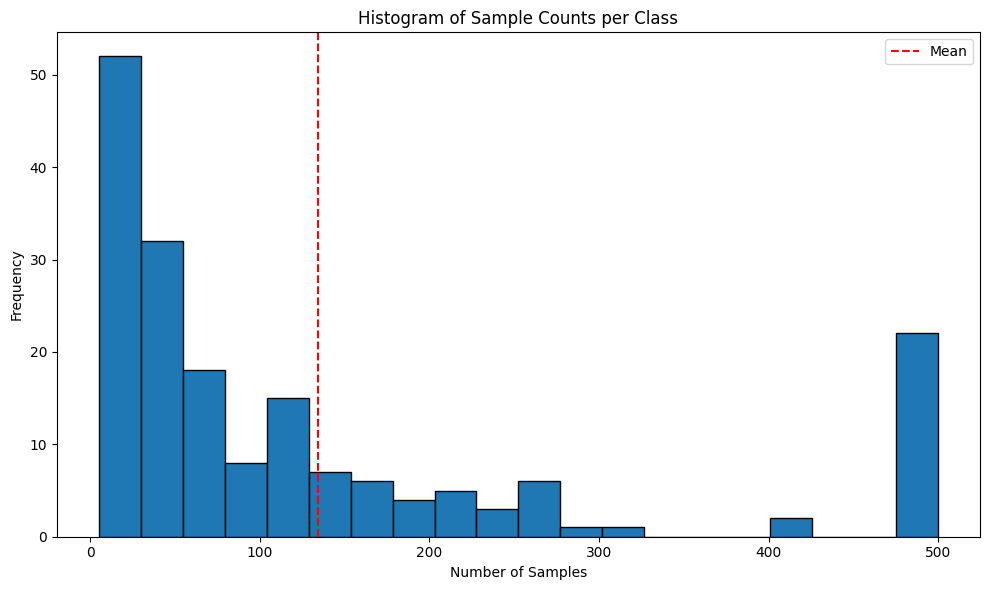

In [ ]:
import os
from collections import Counter

# Define the path to your train dataset folder
train_folder = '/content/birdclef-2024/train_audio'

# Initialize a Counter to store the count of samples for each class
class_counts = Counter()

# Iterate through each subfolder (class) in the train folder
for class_name in os.listdir(train_folder):

    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        # Count the number of files (samples) in each class folder
        num_samples = len(os.listdir(class_path))
        # Store the count in the Counter dictionary
        class_counts[class_name] = num_samples
num_classes = len(class_counts)
# print the number of classes
print(f"number of classes: {num_classes}")
# Print the data distribution (number of samples per class)
print("Data Distribution (Number of Samples per Class):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")

# Calculate summary statistics
sample_counts = list(class_counts.values())
mean_samples = np.mean(sample_counts)
median_samples = np.median(sample_counts)
min_samples = np.min(sample_counts)
max_samples = np.max(sample_counts)
std_dev_samples = np.std(sample_counts)


# Print summary statistics
print("Summary Statistics:")
print(f"Mean: {mean_samples}")
print(f"Median: {median_samples}")
print(f"Min: {min_samples}")
print(f"Max: {max_samples}")
print(f"Standard Deviation: {std_dev_samples}")

# Plot histogram of class counts
plt.figure(figsize=(10, 6))
plt.hist(sample_counts, bins=20, edgecolor='black')
plt.axvline(x=mean_samples, color='r', linestyle='--', label='Mean')
plt.xlabel('Number of Samples')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Counts per Class')
plt.legend()
plt.tight_layout()
plt.show()

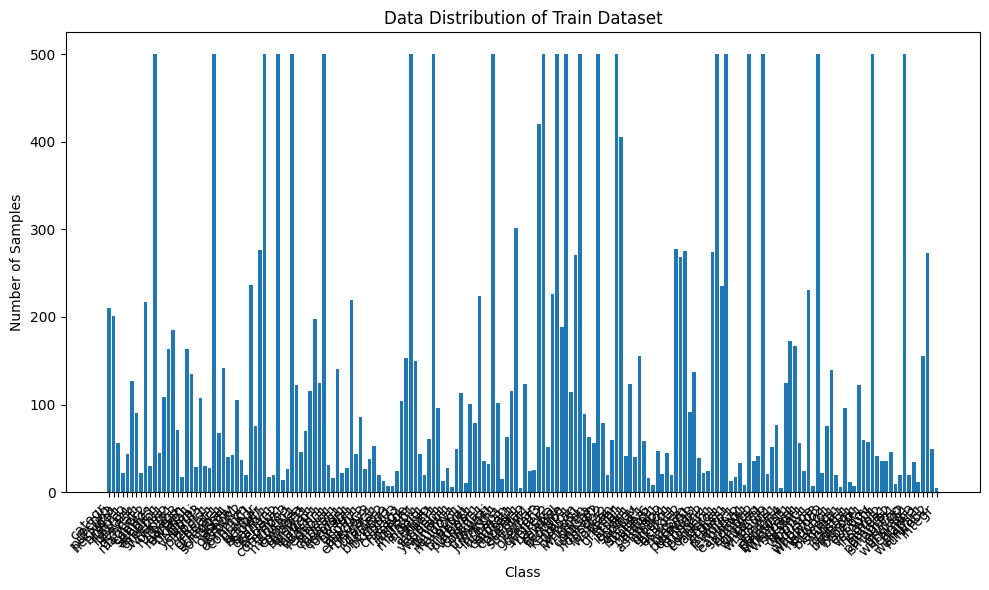

In [ ]:
import matplotlib.pyplot as plt
# Visualize the data distribution using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Data Distribution of Train Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The summary statistics  provided indicate a wide range in the number of samples per class in your dataset:
**
0. number of class: 182
1. Mean: 134.39
2. Median: 60.5
3. Min: 5
4. Max: 500
5. Standard Deviation: 156.40 **
These statistics suggest a highly ***imbalanced*** dataset, where some classes have very few samples (minimum of 5), while others have a significantly larger number of samples (maximum of 500). The mean and standard deviation are also relatively high, indicating a wide spread of sample counts across classes.

When dealing with such imbalanced data, it can pose challenges for machine learning models, including transformer-based models. Transformers, such as the Transformer architecture used in models like BERT, GPT, and variants (e.g., BERT, RoBERTa, GPT-3), can potentially learn from imbalanced data.

so im going to do data augmentation for some low data classes.

***
*Audio Augmentation (for audio data):
Techniques such as time stretching, pitch shifting, adding background noise, and mixing audio can enhance the audio dataset.*
***

In [ ]:
# segregate class count less than 100 and which is allowed to data augmentation.
# Create a new dictionary to store classes with counts less than 100
classes_less_than_100 = {key: value for key, value in class_counts.items() if value < 100}

# Print the classes with counts less than 100
print("Classes with counts less than 100:")
for class_name, count in classes_less_than_100.items():
    print(f"{class_name}: {count} samples")

Classes with counts less than 100:
pursun3: 56 samples
heswoo1: 22 samples
brakit1: 44 samples
lblwar1: 90 samples
lesyel1: 22 samples
maghor2: 30 samples
spepic1: 45 samples
oripip1: 71 samples
rufbab3: 17 samples
bkrfla1: 29 samples
yebbul3: 30 samples
plhpar1: 28 samples
grbeat1: 67 samples
cregos1: 40 samples
sohmyn1: 42 samples
grehor1: 37 samples
jerbus2: 19 samples
cohcuc1: 76 samples
brfowl1: 17 samples
barfly1: 20 samples
kerlau2: 14 samples
aspswi1: 26 samples
mawthr1: 46 samples
compea: 70 samples
bwfshr1: 31 samples
redspu1: 16 samples
chbeat1: 22 samples
moipig1: 27 samples
forwag1: 44 samples
brcful1: 86 samples
aspfly1: 26 samples
placuc3: 38 samples
emedov2: 53 samples
brwjac1: 20 samples
brasta1: 13 samples
darter2: 7 samples
bncwoo3: 7 samples
bkcbul1: 24 samples
indrob1: 44 samples
malpar1: 20 samples
indpit1: 61 samples
ashpri1: 96 samples
inpher1: 13 samples
yebbab1: 28 samples
wynlau1: 6 samples
junowl1: 49 samples
malwoo1: 10 samples
brwowl1: 79 samples
vehpar1: 

Load and Visualize Sound Waves:
Here's an example code snippet to load and visualize sound waves from audio files.

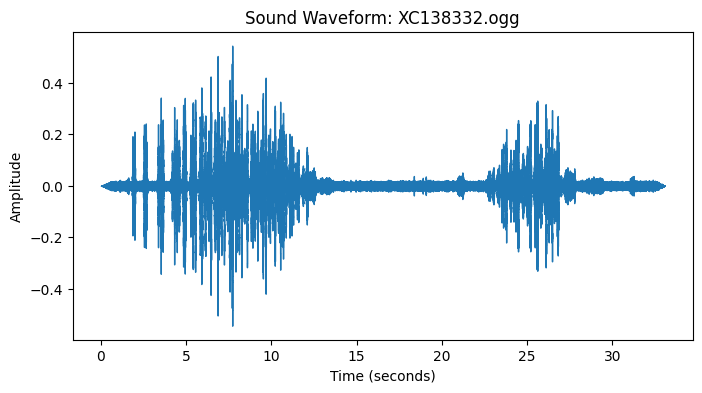

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
file_path= "/content/birdclef-2024/train_audio/barswa/XC138332.ogg"
def load_sound_wave(file_path, sr=22050):
    audio_data, sr = librosa.load(file_path, sr=sr)
    return audio_data, sr

def plot_waveform(audio_data, sr, title="Sound Waveform"):
    plt.figure(figsize=(8, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()



audio_file = file_path.split("/")[-1]
audio_data, sr = load_sound_wave(file_path)
plot_waveform(audio_data, sr, title=f"Sound Waveform: {audio_file}")


In [ ]:
#librosa convert everything in mono channel, so go for scipy
file_path="/content/birdclef-2024/train_audio/asbfly/XC134896.ogg"

# Load the audio file without converting to mono
audio_data, sample_rate = librosa.load(file_path, mono=False)

# Get the number of channels
num_channels = audio_data.shape[0] if audio_data.ndim > 1 else 1

print(f"Number of channels: {num_channels}")


Number of channels: 1


**Extract Features:**
Besides visualizing the sound waveforms, you may want to *extract features like Mel-frequency cepstral coefficients (MFCCs), spectrograms, or
others for machine learning tasks*. Librosa provides functions for such feature extraction.

**Further Analysis or Preprocessing:**
Depending on your specific goals (e.g., classification, clustering, etc.), you might need to perform additional analysis or preprocessing steps such as *normalization, augmentation, or feature scaling*.



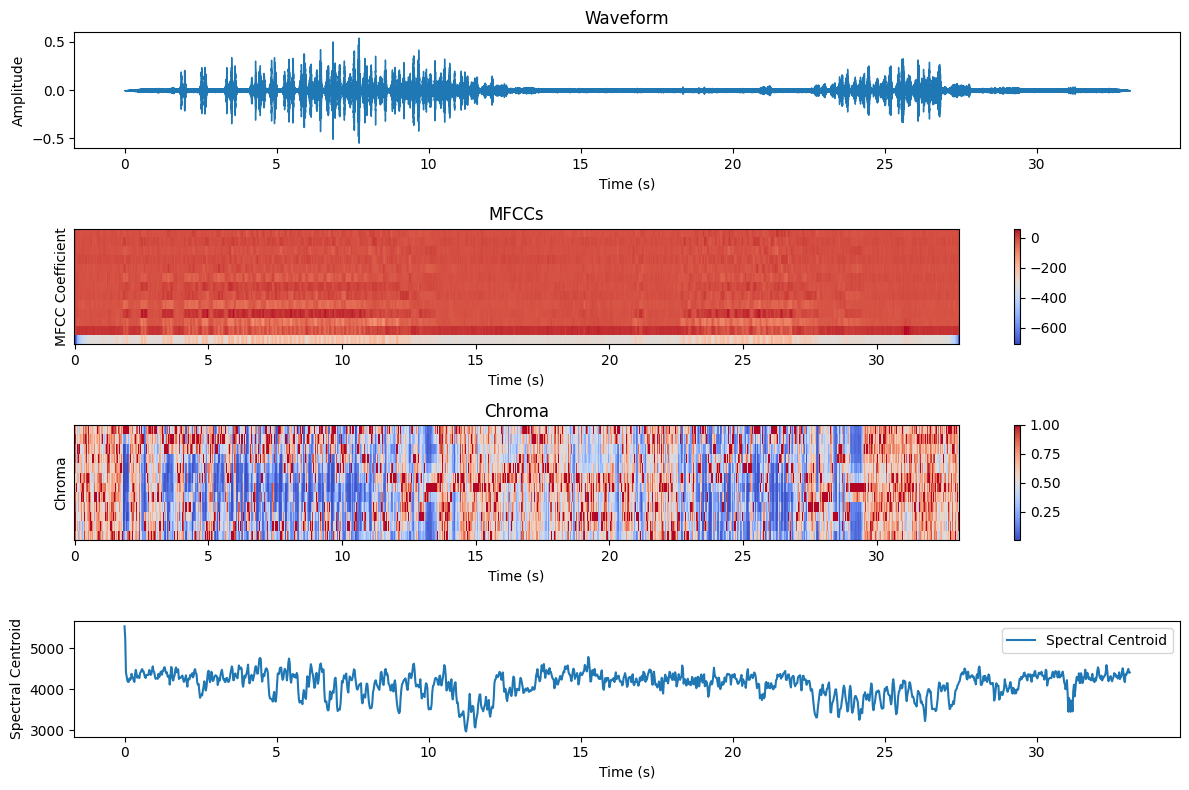

In [ ]:

# Load the audio file
file_path= "/content/birdclef-2024/train_audio/barswa/XC138332.ogg"
audio_data, sr = librosa.load(file_path)

# Extract features
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)
spectral_centroid = librosa.feature.spectral_centroid(y=audio_data, sr=sr)[0]
zcr = librosa.feature.zero_crossing_rate(y=audio_data)[0]

# Plot the features
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(4, 1, 1)
librosa.display.waveshow(audio_data, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot MFCCs
plt.subplot(4, 1, 2)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficient')

# Plot Chroma
plt.subplot(4, 1, 3)
librosa.display.specshow(chroma, x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma')
plt.xlabel('Time (s)')
plt.ylabel('Chroma')

# Plot Spectral Centroid
plt.subplot(4, 1, 4)
plt.plot(librosa.times_like(spectral_centroid), spectral_centroid, label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
file_path= "/content/birdclef-2024/train_audio/barswa/XC138332.ogg"
audio_data, sr = librosa.load(file_path)

# Extract features
mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=40)
print(mfccs)

[[-7.1071375e+02 -7.1071375e+02 -6.9997034e+02 ... -5.3952844e+02
  -5.8558020e+02 -6.6849158e+02]
 [ 0.0000000e+00  0.0000000e+00  8.0686302e+00 ...  2.4404745e+01
   2.6151798e+01  2.7217583e+01]
 [ 0.0000000e+00  0.0000000e+00 -1.4068952e+00 ... -1.4598213e+01
  -1.2583563e+01 -4.6811891e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00 -3.2498580e-01 ... -3.7418646e-01
   8.4545231e-01 -3.9169831e+00]
 [ 0.0000000e+00  0.0000000e+00 -1.3201530e+00 ... -3.7361188e+00
  -4.4849811e+00 -5.7619867e+00]
 [ 0.0000000e+00  0.0000000e+00 -3.0202985e+00 ...  3.1170578e+00
  -1.2584507e+00 -1.6769650e+00]]


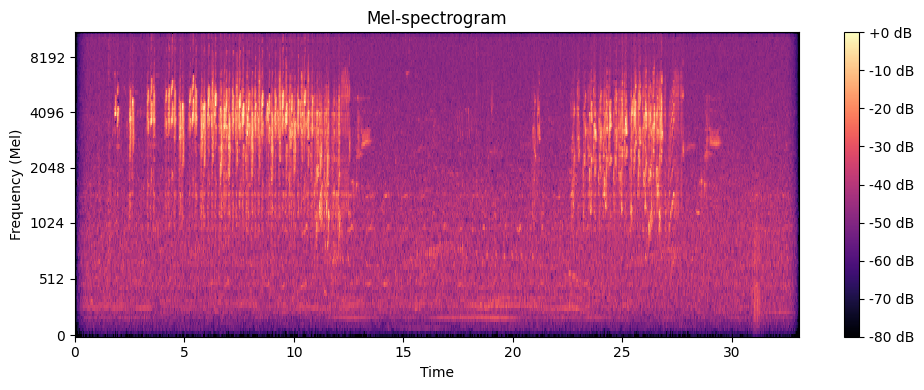

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
file_path= "/content/birdclef-2024/train_audio/barswa/XC138332.ogg"
audio_data, sr = librosa.load(file_path)

# Compute Mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)

# Display the Mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Mel)')
plt.tight_layout()
plt.show()


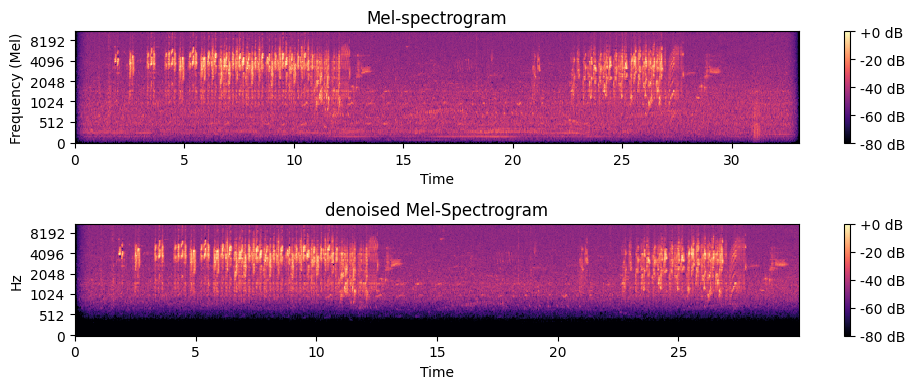

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal



# Function to segment audio and extract Mel-spectrogram
def preprocess_audio(audio_path, segment_duration=30, sample_rate=22050, cutoff_freq=1000, n_mels=128):
    # Load audio file
    audio_data, sr = librosa.load(audio_path, sr=sample_rate, mono=False)

    # Segment audio into chunks of specified duration (in seconds)
    segment_size = segment_duration * sample_rate
    audio_segments = [audio_data[i:i+segment_size] for i in range(0, len(audio_data), segment_size)]

    processed_segments = []
    for segment in audio_segments:
        # Apply high-pass filter
        nyquist_freq = 0.5 * sr
        normal_cutoff = cutoff_freq / nyquist_freq
        b, a = signal.butter(5, normal_cutoff, btype='high', analog=False)
        filtered_audio = signal.lfilter(b, a, segment)

        # Extract Mel-spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=filtered_audio, sr=sr, n_mels=n_mels)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        processed_segments.append(log_mel_spectrogram)

    return processed_segments

# Example usage
file_path= "/content/birdclef-2024/train_audio/barswa/XC138332.ogg"
processed_segments = preprocess_audio(file_path)

# Visualize one of the processed segments (before and after)
# plt.figure(figsize=(12, 6))

# # Plot original audio waveform
# plt.subplot(2, 1, 1)
# librosa.display.waveshow(processed_segments[0], sr=sr, x_axis='time')
# plt.title('Original Audio Waveform')

audio_data, sr = librosa.load(file_path)

# Compute Mel-spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)

# Display the Mel-spectrogram
plt.figure(figsize=(10, 4))
# Plot original audio waveform
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Mel)')


# Plot Mel-spectrogram
# plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 2)
librosa.display.specshow(processed_segments[0], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('denoised Mel-Spectrogram')
plt.tight_layout()
plt.show()



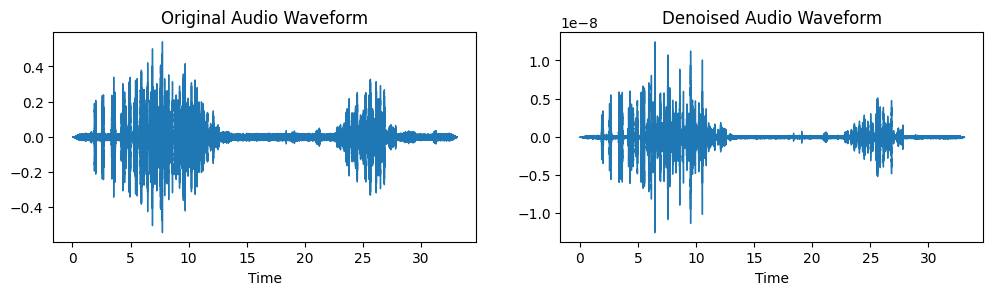

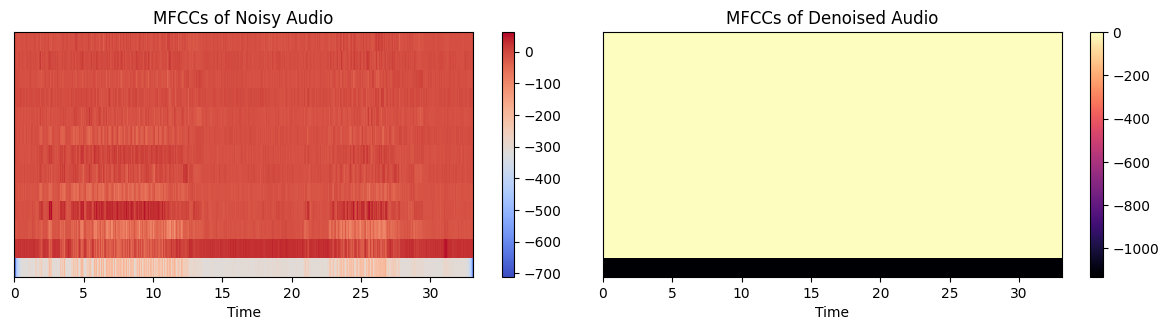

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
from scipy.signal import butter, lfilter, filtfilt
import matplotlib.pyplot as plt


def denoise_audio(audio_segment, cutoff_freq=1000):
    denoised_segment = low_pass_filter(audio_segment, cutoff_freq)
    return denoised_segment

# # Function to denoise audio segment
# def denoise_audio(audio_segment, sample_rate, cutoff_freq=1000):
#     nyquist_freq = 0.5 * sample_rate
#     normal_cutoff = cutoff_freq / nyquist_freq
#     b, a = butter(5, normal_cutoff, btype='high', analog=False)
#     denoised_audio = lfilter(b, a, audio_segment)
#     return denoised_audio

# Function to denoise audio segment using high-pass and low-pass filters
def denoise_audio(audio_segment, sample_rate, low_cutoff=100, high_cutoff=5000):
    nyquist_freq = 0.5 * sample_rate
    low_normal_cutoff = low_cutoff / nyquist_freq
    high_normal_cutoff = high_cutoff / nyquist_freq

    # Design low-pass and high-pass filters
    b_low, a_low = butter(2, low_normal_cutoff, btype='low', analog=False)
    b_high, a_high = butter(5, high_normal_cutoff, btype='high', analog=False)

    # Apply low-pass filter first
    low_passed_audio = filtfilt(b_low, a_low, audio_segment)

    # Apply high-pass filter to the low-pass filtered signal
    denoised_audio = filtfilt(b_high, a_high, low_passed_audio)

    return denoised_audio

# Function to extract MFCCs from an audio segment
def extract_mfcc(audio_segment, sample_rate, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio_segment, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs

# Load audio file using librosa
file_path = file_path
audio_data, sample_rate = librosa.load(file_path)

# Denoise the audio data
denoised_audio = denoise_audio(audio_data, sample_rate)


# Extract MFCCs from both original and denoised audio
mfccs_noisy = extract_mfcc(audio_data, sample_rate)
mfccs_denoised = extract_mfcc(denoised_audio, sample_rate)


# Plot original waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Audio Waveform')
librosa.display.waveshow(audio_data, sr=sample_rate)

# Plot denoised waveform
plt.subplot(2, 2, 2)
plt.title('Denoised Audio Waveform')
librosa.display.waveshow(denoised_audio, sr=sample_rate)

# Plot MFCCs
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
plt.title('MFCCs of Noisy Audio')
librosa.display.specshow(mfccs_noisy, x_axis='time')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('MFCCs of Denoised Audio')
librosa.display.specshow(mfccs_denoised, x_axis='time')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
import librosa
from scipy.signal import butter, lfilter
from pydub.effects import low_pass_filter

def denoise_audio(audio_segment, cutoff_freq=1000):
    denoised_segment = low_pass_filter(audio_segment, cutoff_freq)
    return denoised_segment

def high_pass_filter(audio_segment, sample_rate, cutoff_freq=1000):
    nyquist_freq = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(5, normal_cutoff, btype='high', analog=False)
    filtered_audio = lfilter(b, a, audio_segment)
    return filtered_audio

def extract_mfcc(audio_segment, sample_rate, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio_segment, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs


# Load an audio segment (replace with your actual audio loading code)
audio_segment, sample_rate = librosa.load(file_path)

# Denoise the audio segment
denoised_segment = denoise_audio(audio_segment)

# Apply high-pass filter
filtered_segment = high_pass_filter(denoised_segment, sample_rate)

# Extract MFCCs
mfccs = extract_mfcc(filtered_segment, sample_rate)

# Normalize MFCCs (example using z-score normalization)
mean_mfccs = np.mean(mfccs, axis=1)
std_mfccs = np.std(mfccs, axis=1)
normalized_mfccs = (mfccs - mean_mfccs[:, np.newaxis]) / std_mfccs[:, np.newaxis]


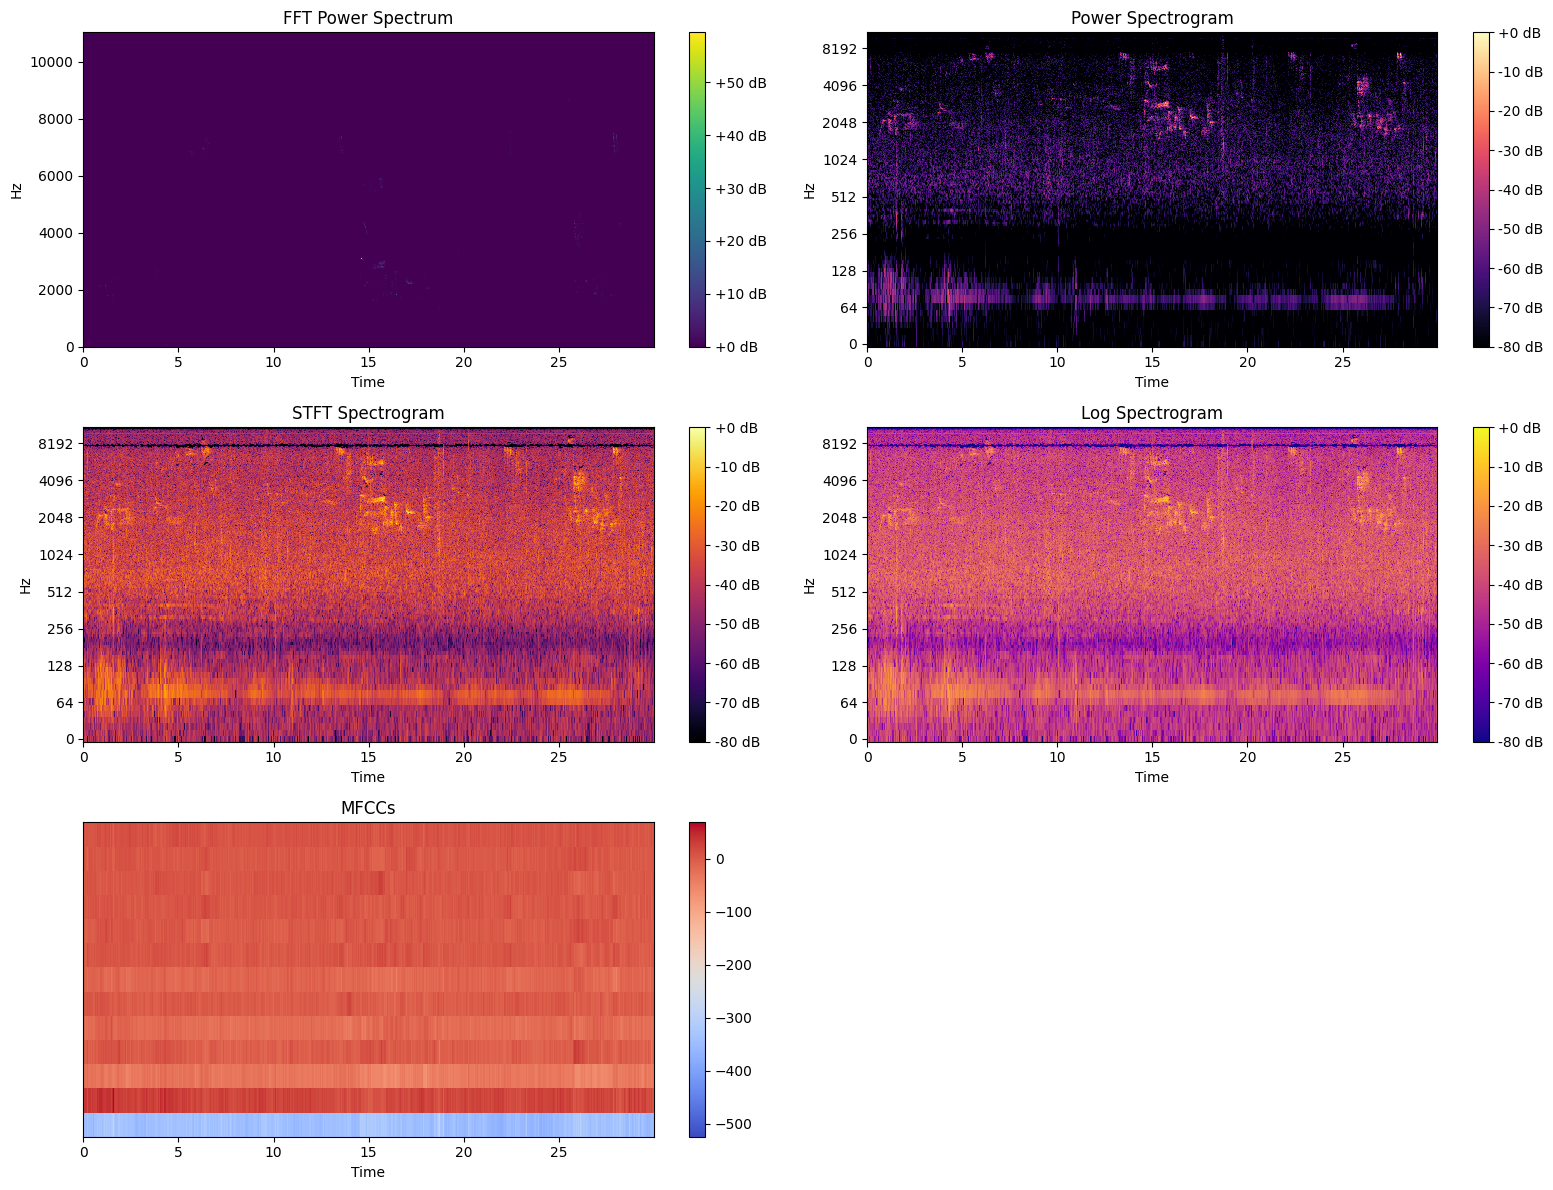

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load audio file using librosa
file_path = '/content/birdclef-2024/train_audio/blakit1/XC128222.ogg'
audio_data, sample_rate = librosa.load(file_path)

# Perform FFT (Fast Fourier Transform) to get the power spectrum
fft_spectrum = np.abs(librosa.stft(audio_data)) ** 2

# Compute Power Spectrogram
power_spectrogram = librosa.amplitude_to_db(fft_spectrum, ref=np.max)

# Compute STFT (Short-Time Fourier Transform) Spectrogram
stft_spectrogram = np.abs(librosa.stft(audio_data))

# Compute Log Spectrogram
log_spectrogram = librosa.amplitude_to_db(stft_spectrogram, ref=np.max)

# Compute MFCCs
n_mfcc = 13  # Number of MFCC coefficients (adjust as needed)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)

# Play the audio
Audio(data=audio_data, rate=sample_rate)

# Plot the various spectrograms and MFCCs
plt.figure(figsize=(16, 12))

# Plot FFT Power Spectrum
plt.subplot(3, 2, 1)
librosa.display.specshow(fft_spectrum, sr=sample_rate, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('FFT Power Spectrum')

# Plot Power Spectrogram
plt.subplot(3, 2, 2)
librosa.display.specshow(power_spectrogram, sr=sample_rate, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Power Spectrogram')

# Plot STFT Spectrogram
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(stft_spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')

# Plot Log Spectrogram
plt.subplot(3, 2, 4)
librosa.display.specshow(log_spectrogram, sr=sample_rate, x_axis='time', y_axis='log', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Spectrogram')

# Plot MFCCs
plt.subplot(3, 2, 5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', cmap='coolwarm')
plt.colorbar()
plt.title('MFCCs')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/birdclef-2024/train_metadata.csv')
df

primary_label secondary_labels      type  latitude  longitude  \
0            asbfly               []  ['call']   39.2297   118.1987   
1            asbfly               []  ['song']   51.4030   104.6401   
2            asbfly               []  ['song']   36.3319   127.3555   
3            asbfly               []  ['call']   21.1697    70.6005   
4            asbfly               []  ['call']   15.5442    73.7733   
...             ...              ...       ...       ...        ...   
24454       zitcis1               []      ['']   43.5925     4.5434   
24455       zitcis1               []      ['']   43.5925     4.5434   
24456       zitcis1               []      ['']   51.1207     4.5607   
24457       zitcis1               []      ['']   41.5607    -8.4236   
24458       zitcis1               []      ['']   13.7747   100.8919   

          scientific_name             common_name  \
0      Muscicapa dauurica  Asian Brown Flycatcher   
1      Muscicapa dauurica  Asian Brown Flycatcher   
2      Muscicapa dauurica  Asian Brown Flycatcher   
3      Muscicapa dauurica  Asian Brown Flycatcher   
4      Muscicapa dauurica  Asian Brown Flycatcher   
...                   ...                     ...   
24454  Cisticola juncidis       Zitting Cisticola   
24455  Cisticola juncidis       Zitting Cisticola   
24456  Cisticola juncidis       Zitting Cisticola   
24457  Cisticola juncidis       Zitting Cisticola   
24458  Cisticola juncidis       Zitting Cisticola   

                                  author  \
0                         Matt Slaymaker   
1                       Magnus Hellström   
2                          Stuart Fisher   
3                              vir joshi   
4      Albert Lastukhin & Sergei Karpeev   
...                                  ...   
24454                  Chèvremont Fabian   
24455                  Chèvremont Fabian   
24456                         Wim Jacobs   
24457                       Jorge Leitão   
24458                         Sam Hambly   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     5.0   
1      Creative Commons Attribution-NonCommercial-Sha...     2.5   
2      Creative Commons Attribution-NonCommercial-Sha...     2.5   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.0   
...                                                  ...     ...   
24454  Creative Commons Attribution-NonCommercial-Sha...     5.0   
24455  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24456  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24457  Creative Commons Attribution-NonCommercial-Sha...     4.5   
24458  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                     url              filename  
0      https://www.xeno-canto.org/134896   asbfly/XC134896.ogg  
1      https://www.xeno-canto.org/164848   asbfly/XC164848.ogg  
2      https://www.xeno-canto.org/175797   asbfly/XC175797.ogg  
3      https://www.xeno-canto.org/207738   asbfly/XC207738.ogg  
4      https://www.xeno-canto.org/209218   asbfly/XC209218.ogg  
...                                  ...                   ...  
24454      https://xeno-canto.org/845747  zitcis1/XC845747.ogg  
24455      https://xeno-canto.org/845817  zitcis1/XC845817.ogg  
24456      https://xeno-canto.org/856176  zitcis1/XC856176.ogg  
24457      https://xeno-canto.org/856723  zitcis1/XC856723.ogg  
24458      https://xeno-canto.org/858550  zitcis1/XC858550.ogg  

[24459 rows x 12 columns]

In [ ]:
# prompt: generate random number between 0 to 24000 and to a variable, import random library, take that random variable as location for dataframe
from IPython.display import Audio
import random
# Set the random seed
random.seed(100)

# Get a random row index from the dataframe
random_number = random.randint(0, len(df) - 1)

# Use the 'location' variable to access a row in the DataFrame
data= df.iloc[random_number]
path = "/content/birdclef-2024/train_audio/"+ data.filename
print(path)

sr= librosa.get_samplerate(path)
Audio(path, rate= sr)


/content/birdclef-2024/train_audio/comfla1/XC620867.ogg


# signal as sig and sample rate as sr

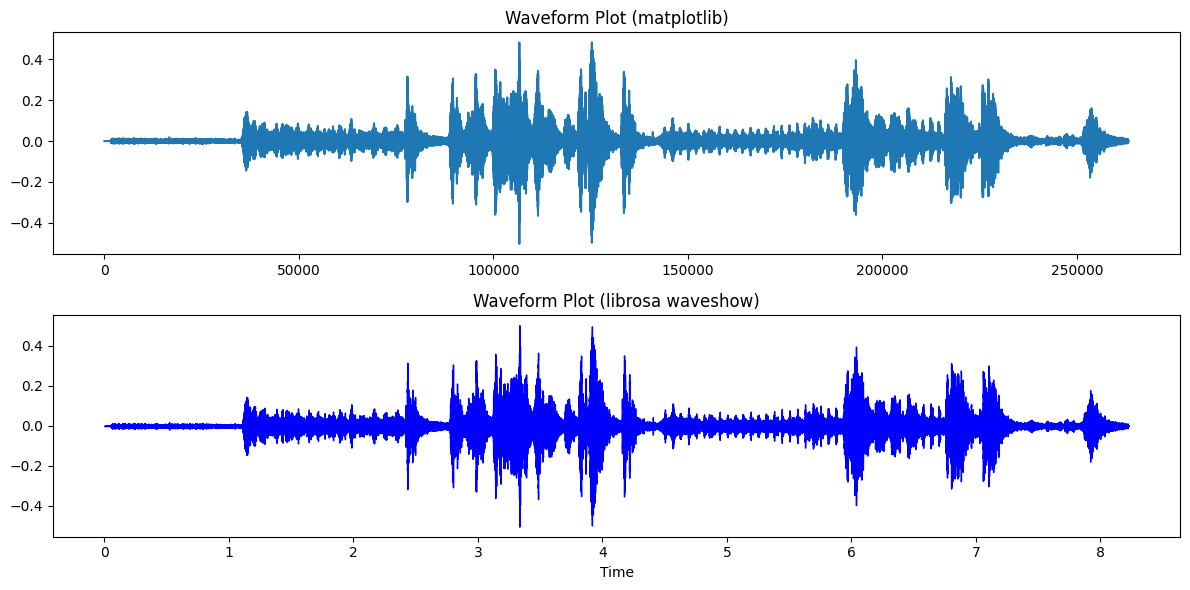

In [ ]:
sig, sr = librosa.load(path, sr=sr, duration=15)
sig, sr, len(sig) / sr

# Plotting using matplotlib directly
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sig)
plt.title("Waveform Plot (matplotlib)")

# Plotting using librosa's display function
plt.subplot(2, 1, 2)
librosa.display.waveshow(sig, sr=sr, color="blue")
plt.title("Waveform Plot (librosa waveshow)")

# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()

[0.15113217 0.12089908 0.08008174 ... 0.00032006 0.00067536 0.00058731] [0.00000000e+00 1.21528371e-01 2.43056742e-01 ... 1.59996962e+04
 1.59998177e+04 1.59999392e+04]


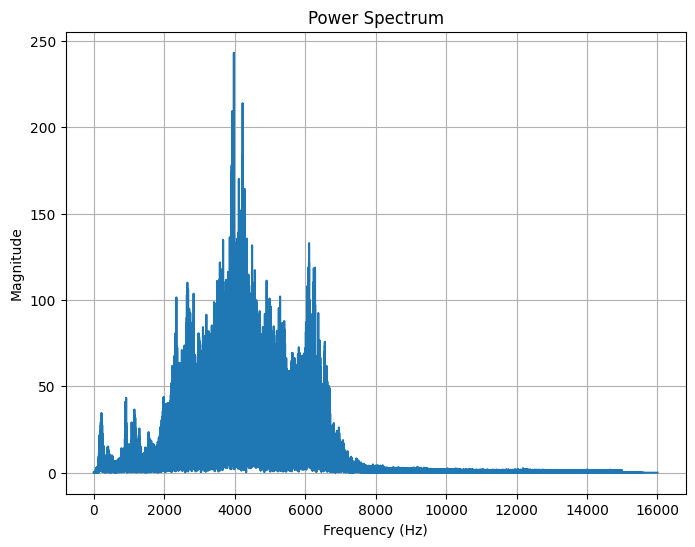

In [ ]:

# Compute FFT
fft_result = np.fft.fft(sig)
magnitude = np.abs(fft_result)
frequency = np.linspace(0, sr, len(magnitude))

# Keep only the positive frequencies (left spectrum)
left_spectrum = magnitude[:len(magnitude) // 2]
left_freq = frequency[:len(magnitude) // 2]

# Plot the power spectrum
plt.figure(figsize=(8, 6))
plt.plot(left_freq, left_spectrum)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")
plt.grid(True)
plt.show()


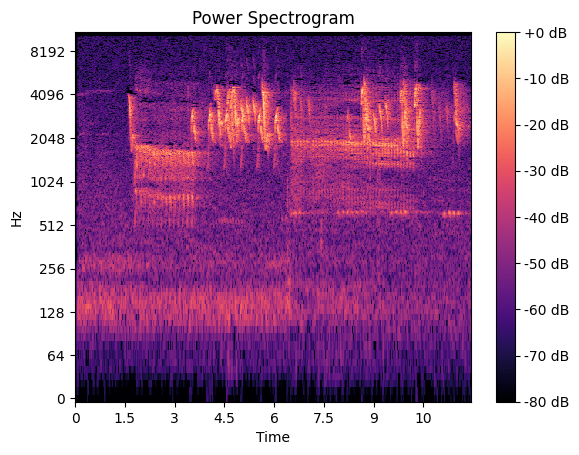

In [ ]:

# Compute the Short-Time Fourier Transform (STFT) and convert to magnitude spectrogram
stft_result = np.abs(librosa.stft(sig))

# Convert the magnitude spectrogram to decibel scale (power spectrogram)
power_spectrogram = librosa.amplitude_to_db(stft_result, ref=np.max)

# Create a figure and axes for plotting
fig, ax = plt.subplots()

# Display the power spectrogram using librosa's specshow function
img = librosa.display.specshow(power_spectrogram, y_axis='log', x_axis='time', ax=ax)

# Set plot title and colorbar label format
ax.set_title('Power Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Show the plot
plt.show()

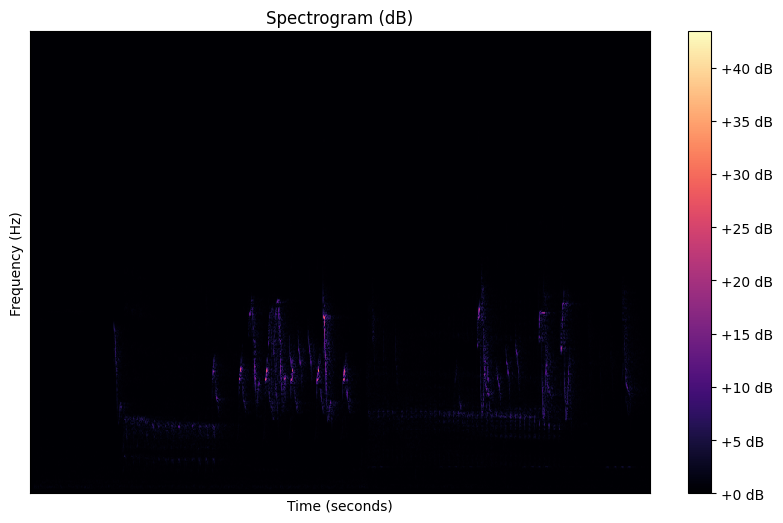

In [ ]:

# Parameters for STFT and spectrogram
hop_length = 256
n_fft = 1024

# Compute durations per frame for time and frequency axes
hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

# Compute STFT and spectrogram
stft = librosa.stft(sig.astype('float'), n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

# Plot the spectrogram
plt.figure(figsize=(10, 6))  # Set the figure size
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)

# Customize plot labels and colorbar
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")  # Format the colorbar labels
plt.title("Spectrogram (dB)")  # Set the plot title

# Show the plot
plt.show()

<ipython-input-61-dd0f0a4a4aee>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Xdb = librosa.amplitude_to_db(X)


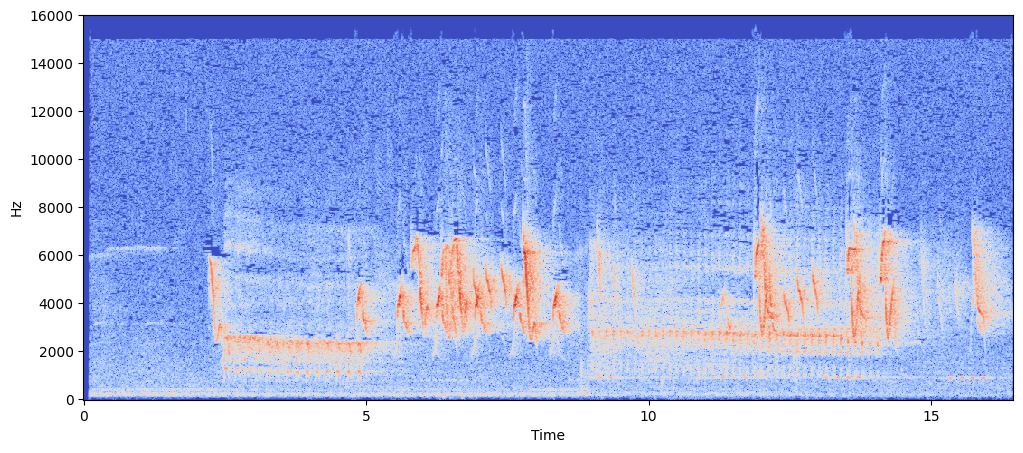

In [ ]:
log_spectrogram = librosa.amplitude_to_db(magnitude)

# Plot the log-scaled spectrogram
plt.figure(figsize=(10, 6))  # Set the figure size
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)

# Customize plot labels and colorbar
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")  # Format the colorbar labels
plt.title("Log Spectrogram (dB)")  # Set the plot title

# Show the plot
plt.show()

In [ ]:
MFCCs = librosa.feature.mfcc(y=sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure()
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.title('MFCCs')

NameError: name 'librosa' is not defined

In [ ]:
!pip install audiomentations

In [ ]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Define a function to load and preprocess audio files
def load_audio(file_path, sr=16000):
    waveform, _ = librosa.load(file_path, sr=sr)
    return waveform

# Define a function to apply data augmentation to audio samples
def augment_audio(waveform, augmentation):
    augmented_waveform = augmentation(samples=waveform, sample_rate=sr)
    return augmented_waveform

# Define data augmentation pipeline
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5)
])


# Specify the audio file path
audio_file= path

# Load audio file
waveform = load_audio(audio_file)

# Apply data augmentation
augmented_waveform = augment_audio(waveform, augment)

# Plot original and augmented waveforms for visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Waveform")
plt.plot(waveform)
plt.subplot(1, 2, 2)
plt.title("Augmented Waveform")
plt.plot(augmented_waveform)
plt.show()

AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations